# Heart Disease Dataset - Exploratory Data Analysis

This notebook explores the heart disease dataset to understand the features, distributions, and relationships before model building.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline

In [6]:
# Load the dataset
df = pd.read_csv('C:/Users/DELL/Desktop/heart-xai-chatbot/data/heart.csv')

# Display the first few rows
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()

Missing values per column:


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# Summary statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


HeartDisease class distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


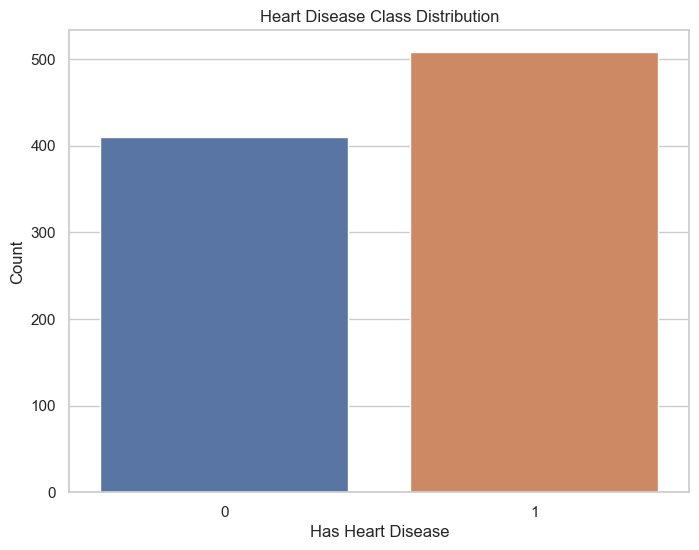

In [10]:
# Check HeartDisease class distribution
target_counts = df['HeartDisease'].value_counts()
print("HeartDisease class distribution:")
print(target_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Has Heart Disease')
plt.ylabel('Count')
plt.show()


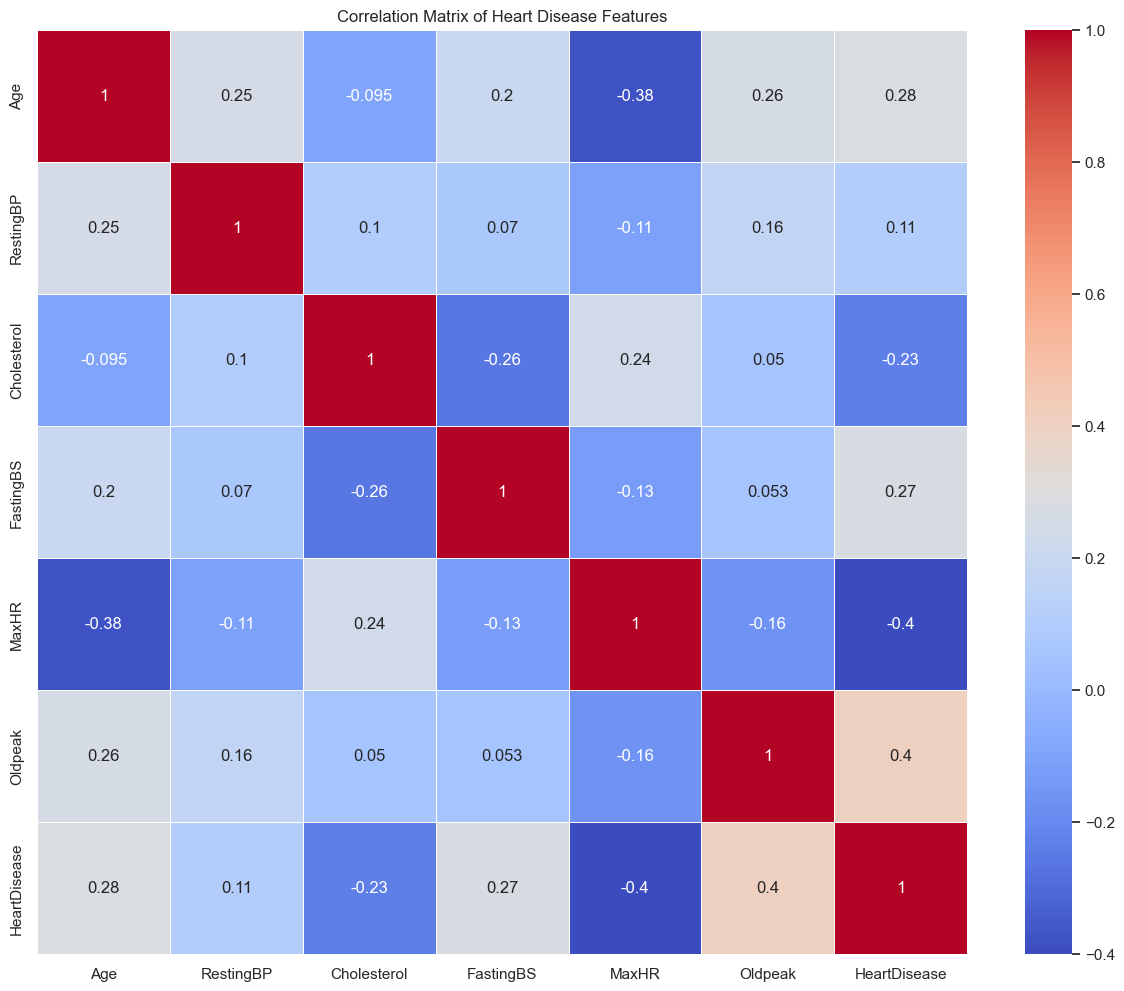

In [12]:
# Analyze relationships between numerical features
plt.figure(figsize=(15, 12))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Features')
plt.show()


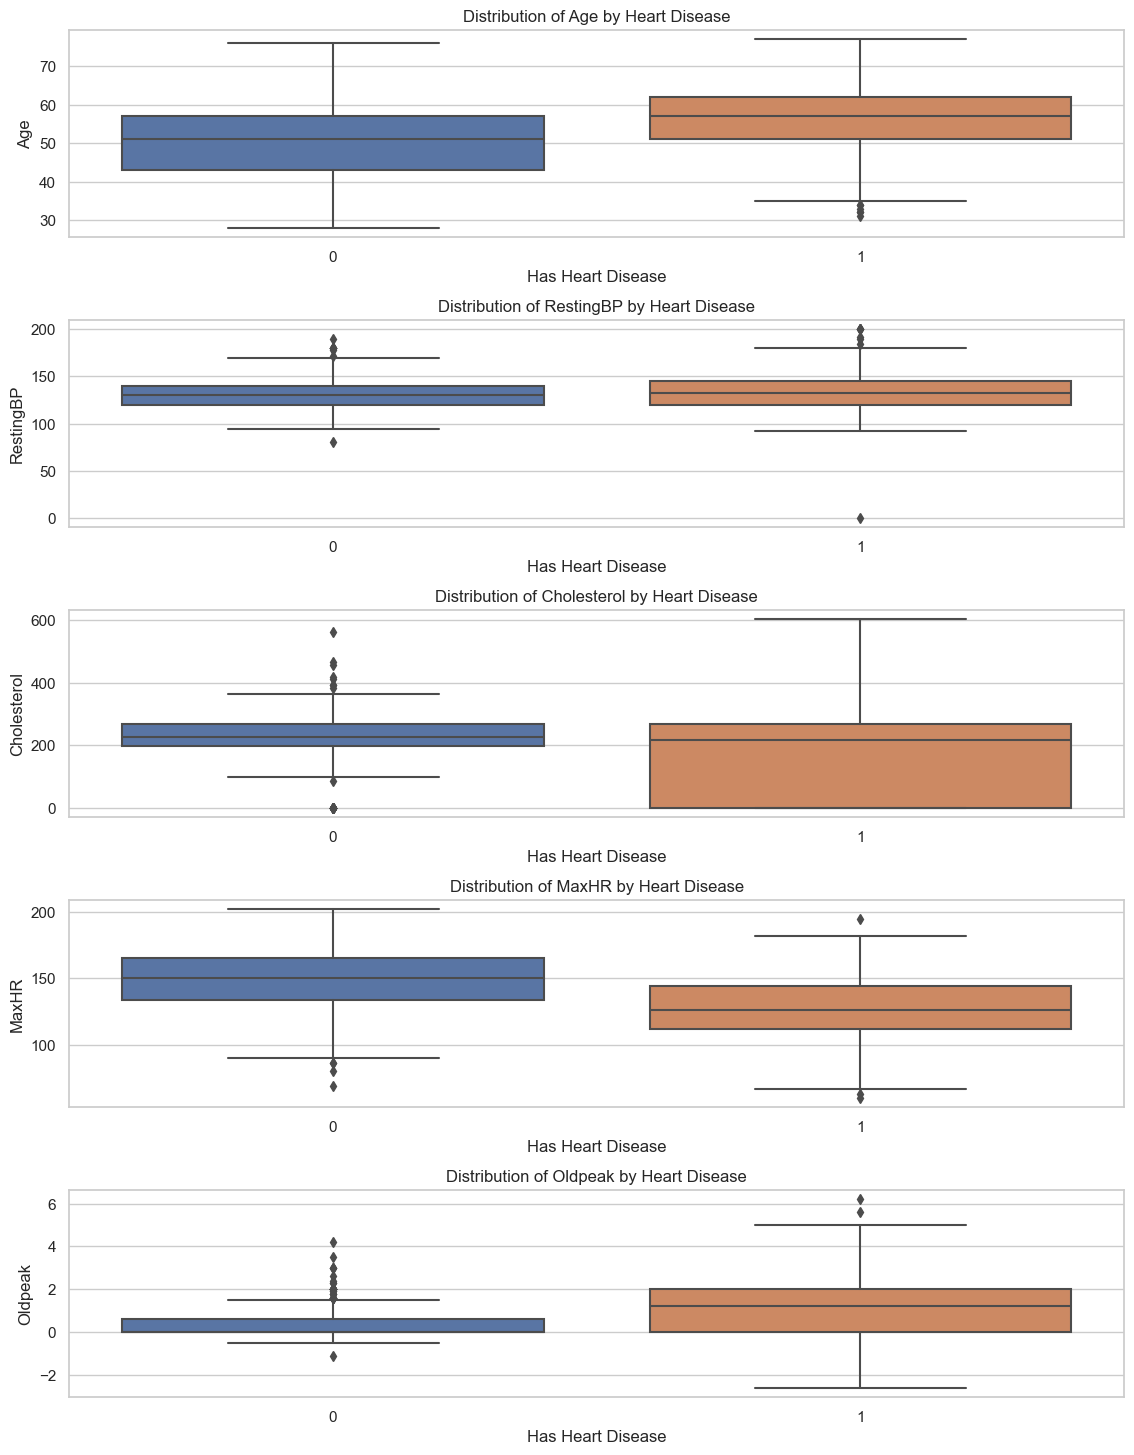

In [14]:
# Visualize key numerical features by HeartDisease class
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, 15))
fig.tight_layout(pad=3.0)

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='HeartDisease', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Heart Disease')
    axes[i].set_xlabel('Has Heart Disease')
    
plt.show()


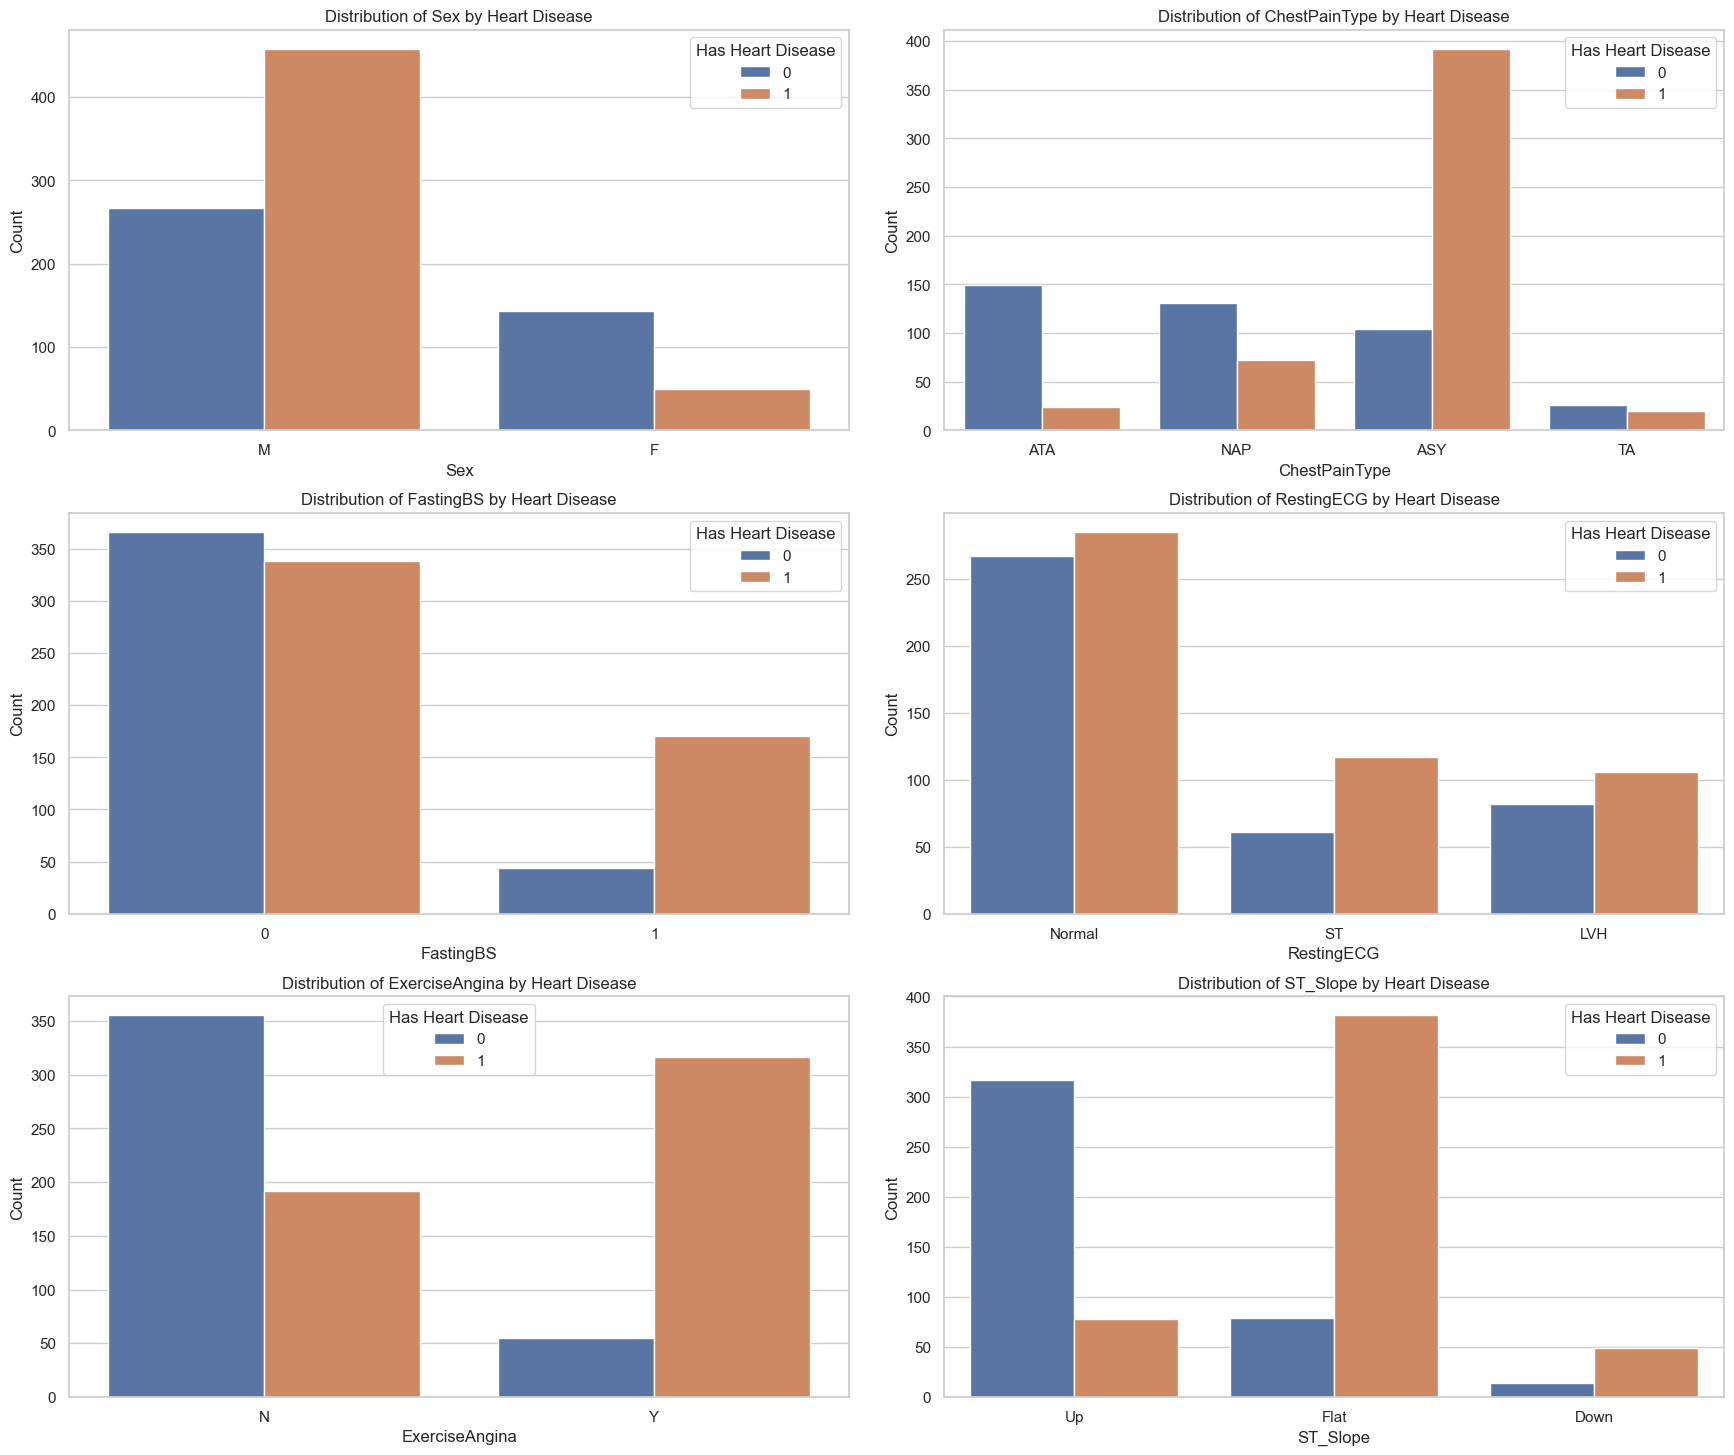

In [16]:
# Visualize categorical features
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 
                        'ExerciseAngina', 'ST_Slope']  # Adjusted to your real column names

fig, axes = plt.subplots(3, 2, figsize=(18, 15))  # 6 plots = 3 rows x 2 columns
fig.tight_layout(pad=3.0)
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='HeartDisease', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Heart Disease')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Has Heart Disease')
    
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


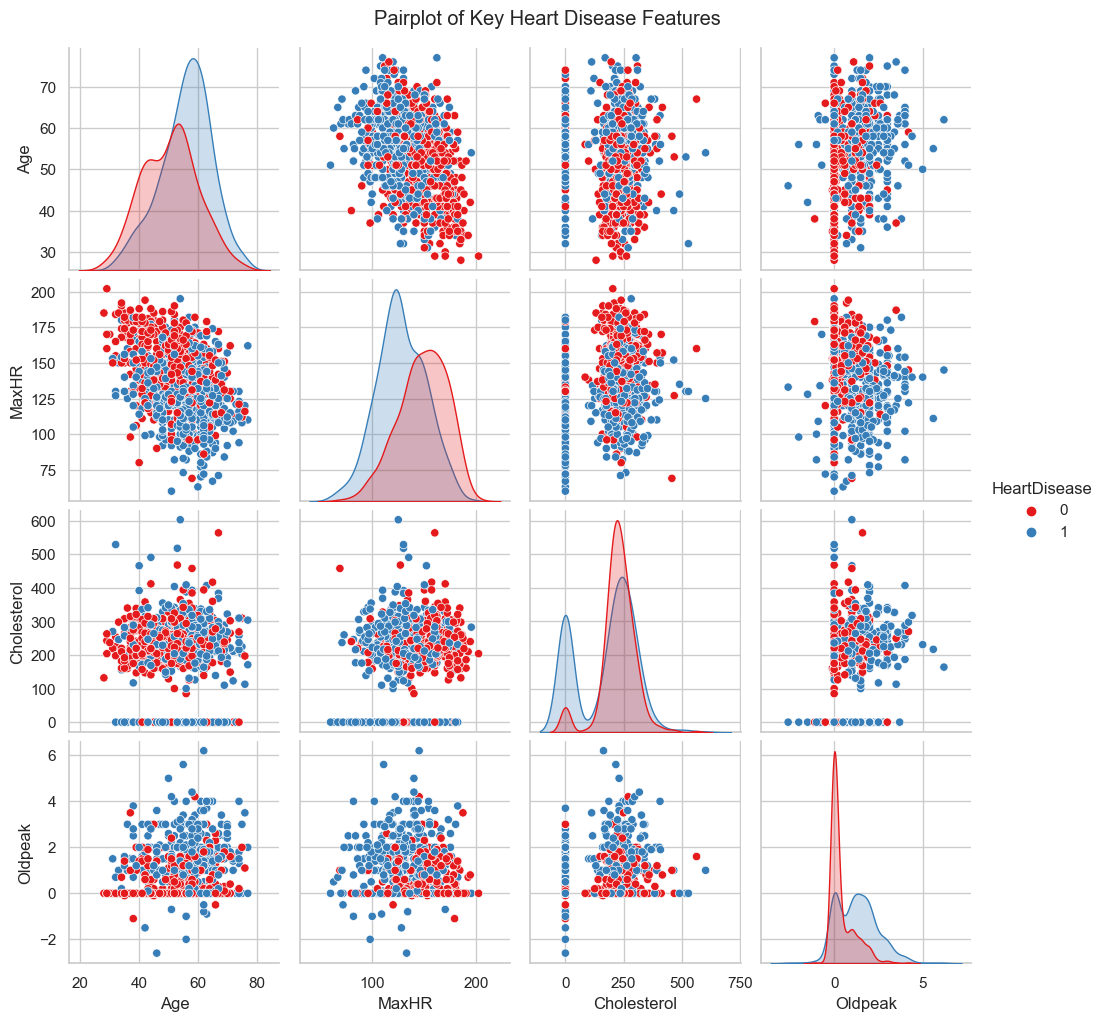

In [18]:
# Pairplot for key features
important_features = ['Age', 'MaxHR', 'Cholesterol', 'Oldpeak', 'HeartDisease']

sns.pairplot(df[important_features], hue='HeartDisease', palette='Set1')
plt.suptitle('Pairplot of Key Heart Disease Features', y=1.02)
plt.show()


## Key Findings

1. **Class Distribution**: The dataset is fairly balanced between positive and negative cases, which is good for model training.

2. **Correlations**: Several features show moderate to strong correlations with the target variable:
   - `thalach` (maximum heart rate achieved): Higher heart rates tend to be associated with less heart disease
   - `oldpeak` (ST depression induced by exercise): Higher values correlate with higher disease risk
   - `cp` (chest pain type): Certain types of chest pain are more indicative of heart disease

3. **Age Distribution**: Older patients appear slightly more likely to have heart disease, but the trend isn't overwhelming

4. **Cholesterol**: There's less separation by target class than might be expected, suggesting this may not be as predictive on its own

5. **Categorical Features**: `ca` (number of major vessels), `thal`, and `cp` (chest pain type) show clear differences in distribution between positive and negative cases

These insights will guide our feature engineering and modeling approach in the next notebook.